In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 6s 0us/step


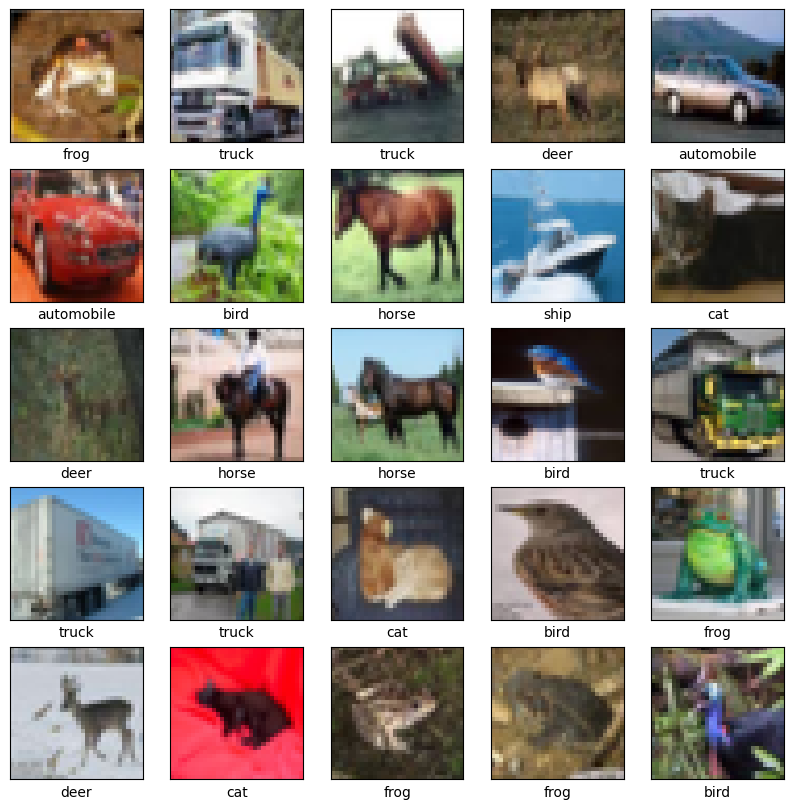

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
       'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
# Model definition
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels))


Epoch 1/100
1563/1563 [==============================] - 31s 10ms/step - loss: 3.0054 - accuracy: 0.3032 - val_loss: 2.3780 - val_accuracy: 0.4379
Epoch 2/100
1563/1563 [==============================] - 15s 10ms/step - loss: 2.5177 - accuracy: 0.4071 - val_loss: 2.1993 - val_accuracy: 0.4947
Epoch 3/100
1563/1563 [==============================] - 16s 10ms/step - loss: 2.2962 - accuracy: 0.4617 - val_loss: 2.1076 - val_accuracy: 0.5191
Epoch 4/100
1563/1563 [==============================] - 15s 10ms/step - loss: 2.1299 - accuracy: 0.5006 - val_loss: 1.9810 - val_accuracy: 0.5378
Epoch 5/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.9808 - accuracy: 0.5322 - val_loss: 1.8361 - val_accuracy: 0.5719
Epoch 6/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8461 - accuracy: 0.5588 - val_loss: 1.9011 - val_accuracy: 0.5433
Epoch 7/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7304 - accuracy: 0.5847 - val_loss: 1.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        2

313/313 - 1s - loss: 0.6641 - accuracy: 0.8208 - 874ms/epoch - 3ms/step


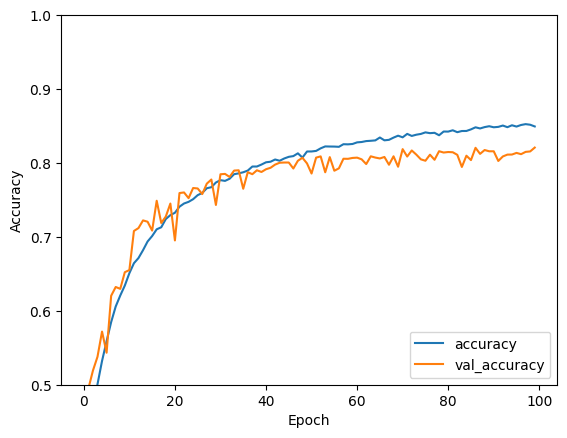

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print("Akurasi: {:.2%}".format(test_acc))

Akurasi: 82.08%


### Kesimpulan
Berdasarkan hasil eksperimen, model tanpa PCA memiliki akurasi yang lebih tinggi (99%) dibandingkan model dengan PCA (96%). Model tanpa PCA menggunakan arsitektur yang lebih kompleks dengan lebih banyak lapisan konvolusi dan Flatten, yang memungkinkannya menangkap fitur-fitur dan pola yang lebih penting dari gambar-gambar MNIST.

Reduksi dimensi PCA dapat membantu mengurangi dimensi data, namun pada kasus ini, PCA tidak memberikan representasi yang optimal untuk dataset MNIST. Reduksi dimensi PCA dapat menghilangkan informasi penting dari data, yang dapat mempengaruhi kemampuan model untuk memahami pola yang kompleks dalam gambar-gambar digit.